<h1> <font color = red> Proyecto 1: LifeStore </font></h1>

<h3> Análisis realizado por: González Martínez Salvador Eduardo </h3>

In [1]:
#Inicio de sesión al sistema 
'''
CREDENCIALES
Usuario: ['edmtz']
Contraseña: ['ifdhi3948Sd']
'''
#Mensaje de bienvenida
mensaje_bienvenida = 'Bienvenido al sistema\nAccede con tus credenciales'
print(mensaje_bienvenida)

#Revisión del número de intentos
usuarioAccedio = False
intentos = 1
while not usuarioAccedio:
    #Ingreso de credenciales
    usuario = input('Usuario: ')
    contraseña = input('Contraseña: ')
    #Revisión de credenciales
    if usuario == 'edmtz' and contraseña == 'ifdhi3948Sd':
        usuarioAccedio = True
        print('¡Hola de nuevo!')
    else:
        if usuario == 'edmtz':
            print('Contraseña errónea')
        else:
            print(f'El usuario: "{usuario}" no está registrado')
        print('Tienes ', 3 - intentos, ' intentos restantes')
    intentos += 1
    if intentos == 3:
        exit()

Bienvenido al sistema
Accede con tus credenciales
Usuario: edmtz
Contraseña: ifdhi3948Sd
¡Hola de nuevo!


In [7]:
#Importar las librerías a utilizar
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Abrir los datos de lifestore
#Cambiar el path (de acuerdo a donde se encuntren ubicados los archivos)
os.chdir(r'C:\Users\user\Desktop\EMTECH\proyecto1')
#Cargar las variables de búsqueda, productos y ventas
from lifestore_file import lifestore_searches, lifestore_products, lifestore_sales
#Declaración de variables
searches = lifestore_searches
products = lifestore_products
sales = lifestore_sales

Variables importadas de **lifestore_file.py**:

<p><font color = blue><b>searches</b></font> = [id_search, id product]</p>

<p><font color = green><b>products</b></font> = [id_product, name, price, category, stock]</p>

<p><font color = red><b>sales</b></font> = [id_sale, id_product, score (from 1 to 5), date, refund (1 for true or 0 to false)]

In [9]:
#¿Cuántos productos tenemos?
n_products = len(products)
print('En total se tienen {} productos'.format(n_products)) 

En total se tienen 96 productos


In [10]:
#Número de búsquedas 
n_searches = len(searches)
print('Se realizaron {} búsquedas'.format(n_searches))

Se realizaron 1033 búsquedas


In [11]:
#Número de ventas 
n_sales = len(sales)
print('Hubieron {} ventas'.format(n_sales))

Hubieron 283 ventas


In [12]:
#¿Cuántas veces fue buscado cada uno de los productos?
'''
Searched_idProducts es una lista que contiene 2 arreglos:
    1. Id del producto que fue buscado
    2. Frecuencia en que este producto se buscó 
'''
searched_idProducts = np.unique([product[1] for product in searches], return_counts = True)

In [13]:
#IDs de los productos en orden descendente de acuerdo a la frecuencia de búsqueda
searchFrecuency_index = [] #Lista de la frecuencia de las búsquedas con su respectivo índice en la variable searched_idProducts
for index, frecuency in enumerate(searched_idProducts[1]):
    searchFrecuency_index.append([frecuency, index])
searchFrecuency_index.sort(reverse = True) #Se ordena de mayor a menor frecuencia
sortedSearched_idProducts = [searched_idProducts[0][index[1]] for index in searchFrecuency_index] #Searches ids (mayor a menor)

#Crear un diccionario de products para facilitar la búsqueda usando los IDs
products_dict = {}
for product in products:
    products_dict[product[0]] = product[1:]

#Lista de los productos en orden descendente de acuerdo a su frecuencia de búsqueda
sortedSearched_products = [products_dict[searchID][0] for searchID in sortedSearched_idProducts]

In [14]:
#Top 10 productos más buscados
top10_mostSearchedProducts = sortedSearched_products[0:10]
print('Top 10 productos más buscados:')
for product in top10_mostSearchedProducts:
    print('•{}'.format(product))

Top 10 productos más buscados:
•SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm
•SSD Adata Ultimate SU800, 256GB, SATA III, 2.5'', 7mm
•Tarjeta Madre ASUS micro ATX TUF B450M-PLUS GAMING, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
•Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, Six-Core, 16MB L3 Cache, con Disipador Wraith Stealth
•Procesador AMD Ryzen 3 3200G con Gráficos Radeon Vega 8, S-AM4, 3.60GHz, Quad-Core, 4MB L3, con Disipador Wraith Spire
•Logitech Audífonos Gamer G635 7.1, Alámbrico, 1.5 Metros, 3.5mm, Negro/Azul
•TV Monitor LED 24TL520S-PU 24, HD, Widescreen, HDMI, Negro
•Procesador Intel Core i7-9700K, S-1151, 3.60GHz, 8-Core, 12MB Smart Cache (9na. Generación Coffee Lake)
•SSD XPG SX8200 Pro, 256GB, PCI Express, M.2
•Procesador Intel Core i3-9100F, S-1151, 3.60GHz, Quad-Core, 6MB Cache (9na. Generación - Coffee Lake)


In [15]:
#Top 10 productos menos buscados
top10_leastSearchedProducts = sortedSearched_products[-10:]
top10_leastSearchedProducts.reverse()
print('Top 10 productos menos buscados:')
for product in top10_leastSearchedProducts:
    print('•{}'.format(product))

Top 10 productos menos buscados:
•Procesador Intel Core i3-8100, S-1151, 3.60GHz, Quad-Core, 6MB Smart Cache (8va. Generación - Coffee Lake)
•MSI GeForce 210, 1GB GDDR3, DVI, VGA, HDCP, PCI Express 2.0
•Tarjeta de Video VisionTek AMD Radeon HD5450, 2GB GDDR3, PCI Express x16
•Tarjeta Madre Gigabyte micro ATX Z390 M GAMING, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel 
•Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151, Intel H110, 32GB DDR4, para Intel
•SSD Samsung 860 EVO, 1TB, SATA III, M.2
•Samsung Smart TV LED 43, Full HD, Widescreen, Negro
•Ghia Bocina Portátil BX800, Bluetooth, Inalámbrico, 2.1 Canales, 31W, USB, Negro
•Ginga Audífonos con Micrófono GI18ADJ01BT-RO, Bluetooth, Alámbrico/Inalámbrico, 3.5mm, Rojo
•Tarjeta de Video Asus NVIDIA GeForce GTX 1050 Ti Phoenix, 4GB 128-bit GDDR5, PCI Express 3.0


In [16]:
#¿Cuántas veces fue vendido cada uno de los productos?
'''
sold_idProducts es una lista que contiene 2 arreglos:
    1. Id del producto que fue vendido
    2. Frecuencia en que este producto se vendió 
'''
sold_idProducts = np.unique([product[1] for product in sales], return_counts = True)

In [17]:
#IDs de los productos en orden descendente de acuerdo a la frecuencia de venta
soldFrecuency_index = [] #Lista de la frecuencia de las ventas con su respectivo índice en la variable sold_idProducts
for index, frecuency in enumerate(sold_idProducts[1]):
    soldFrecuency_index.append([frecuency, index])
soldFrecuency_index.sort(reverse = True) #Se ordena de mayor a menor frecuencia
sortedSold_idProducts = [sold_idProducts[0][index[1]] for index in soldFrecuency_index] #Los Id de searches(mayor a menor)

#Lista de los productos en orden descendente de acuerdo a las frecuencias de sus ventas
sortedSold_products = [products_dict[searchID][0] for searchID in sortedSold_idProducts]

In [18]:
#Top 10 productos más vendidos
top10_mostSoldProducts = sortedSold_products[0:10]
print('Top 10 productos más vendidos:')
for product in top10_mostSoldProducts:
    print('•{}'.format(product))

Top 10 productos más vendidos:
•SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm
•Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, Six-Core, 16MB L3 Cache, con Disipador Wraith Stealth
•Procesador Intel Core i3-9100F, S-1151, 3.60GHz, Quad-Core, 6MB Cache (9na. Generación - Coffee Lake)
•Tarjeta Madre ASRock Micro ATX B450M Steel Legend, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
•SSD Adata Ultimate SU800, 256GB, SATA III, 2.5'', 7mm
•Tarjeta Madre ASUS micro ATX TUF B450M-PLUS GAMING, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
•Procesador AMD Ryzen 3 3200G con Gráficos Radeon Vega 8, S-AM4, 3.60GHz, Quad-Core, 4MB L3, con Disipador Wraith Spire
•Procesador AMD Ryzen 5 3600, S-AM4, 3.60GHz, 32MB L3 Cache, con Disipador Wraith Stealth
•SSD XPG SX8200 Pro, 256GB, PCI Express, M.2
•SSD Kingston A2000 NVMe, 1TB, PCI Express 3.0, M2


In [19]:
#Top 10 productos menos vendidos
top10_leastSoldProducts = sortedSold_products[-10:]
top10_leastSoldProducts.reverse()
print('Top 10 productos menos vendidos:')
for product in top10_leastSoldProducts:
    print('•{}'.format(product))

Top 10 productos menos vendidos:
•MSI GeForce 210, 1GB GDDR3, DVI, VGA, HDCP, PCI Express 2.0
•Tarjeta de Video Asus NVIDIA GeForce GTX 1050 Ti Phoenix, 4GB 128-bit GDDR5, PCI Express 3.0
•Tarjeta de Video Gigabyte AMD Radeon R7 370 OC, 2GB 256-bit GDDR5, PCI Express 3.0
•Tarjeta de Video MSI NVIDIA GeForce GTX 1050 Ti OC, 4GB 128-bit GDDR5, PCI Express x16 3.0
•Tarjeta de Video Zotac NVIDIA GeForce GTX 1660 Ti, 6GB 192-bit GDDR6, PCI Express x16 3.0
•Tarjeta Madre Gigabyte XL-ATX TRX40 Designare, S-sTRX4, AMD TRX40, 256GB DDR4 para AMD
•Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151, Intel H110, 32GB DDR4, para Intel
•Tarjeta Madre Gigabyte micro ATX GA-H110M-DS2, S-1151, Intel H110, 32GB DDR4 para Intel
•SSD Crucial MX500, 1TB, SATA III, M.2
•Kit Memoria RAM Corsair Dominator Platinum DDR4, 3200MHz, 16GB (2x 8GB), Non-ECC, CL16, XMP


In [20]:
#Buscar si hay productos sin reseñas. En caso de existir se deberían eliminar (no hay)
reviews = []
for sale in sales:
    reviews.append(sale[2])
print('Los valores que se pueden encontrar en las valoraciones son {}'.format(np.unique(reviews)))
print(np.where(np.isnan(reviews) == True)[0], '-> No hay valores nulos')

Los valores que se pueden encontrar en las valoraciones son [1 2 3 4 5]
[] -> No hay valores nulos


In [21]:
#Buscar ahora los productos que no se vendieron y que, en este sentido, no tienen reseña 
noReview_idProducts = []
for product in range(1, n_products + 1):
    if product not in sold_idProducts[0]:
        noReview_idProducts.append(product)
print('De los {} productos, hubo ventas de {} productos'.format(len(products), len(products) - len(noReview_idProducts)))
print('{} productos no se vendieron'.format(len(noReview_idProducts)))

De los 96 productos, hubo ventas de 42 productos
54 productos no se vendieron


In [22]:
#¿Cuáles son los productos con devolución?
refund_idProduct = [] #lista que contendrá los id de los productos que han sido devueltos
for sale in sales:
    if sale[-1] == 1:
        refund_idProduct.append(sale[1])
refund_products = [products_dict[ID][0] for ID in refund_idProduct] #Lista de los productos con devolución
refund_products

['Procesador AMD Ryzen 5 3600, S-AM4, 3.60GHz, 32MB L3 Cache, con Disipador Wraith Stealth',
 'Tarjeta de Video Gigabyte AMD Radeon R7 370 OC, 2GB 256-bit GDDR5, PCI Express 3.0',
 'Tarjeta Madre ASUS micro ATX TUF B450M-PLUS GAMING, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD',
 'Tarjeta Madre AORUS micro ATX B450 AORUS M (rev. 1.0), S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD',
 'Tarjeta Madre AORUS micro ATX B450 AORUS M (rev. 1.0), S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD',
 'Tarjeta Madre AORUS micro ATX B450 AORUS M (rev. 1.0), S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD',
 'Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151, Intel H110, 32GB DDR4, para Intel',
 'Tarjeta Madre Gigabyte micro ATX GA-H110M-DS2, S-1151, Intel H110, 32GB DDR4 para Intel',
 "SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm"]

In [23]:
#Promedio de reseña por productos que fueron vendidos 
reviewed_idProducts = [sale[1:3] for sale in sales] #Lista anidada de 2 elementos: id de producto y reseña de la venta realizada
meanReview_idProducts = [] #Lista que contiene listas anidadas con 2 elementos: id de producto y reseña promedio 
index = 0
for product in sold_idProducts[0]:
    mean = []
    position = reviewed_idProducts[index]
    while product == position[0]:
        mean.append(position[1])
        index += 1
        try:
            position = reviewed_idProducts[index]
        except:
            break
    meanReview_idProducts.append([product, np.mean(mean)])

In [24]:
#Top 5 productos mejor reseñados. Criterio: valoración de 5 y mayor número de reseñas

#Mejores productos con criterio de reseña promedio 
best_idReviewed = [] 
for review in meanReview_idProducts:
    if review[1] == 5.0:
        best_idReviewed.append(review[0])

#Productos con reseña de 5 junto con su número de valoraciones
bestHot_idReviewed = [] #Lista con listas anidadas de 2 elementos: id de producto valorado en 5 y número de valoraciones
for index, product in enumerate(sold_idProducts[0]):
    if product in best_idReviewed:
        bestHot_idReviewed.append([product, sold_idProducts[1][index]])
        
#Productos con reseña de 5 junto con su número de valoraciones (ordenado de forma descendente)
bestHot_idReviewed_sorted = []
loop = len(bestHot_idReviewed)
top = []
while loop != 0:
    comparator = bestHot_idReviewed[0][1]
    top = bestHot_idReviewed[0]
    for review in bestHot_idReviewed[1:]:
        if review[1] >= comparator:
            comparator = review[1]
            top = review
        else:
            continue
    bestHot_idReviewed_sorted.append(top)
    bestHot_idReviewed.remove(top)
    loop -= 1
        
#IDs de los mejores 5 productos con reseña de 5 y mayor número de valoraciones
best5_idReviewed = bestHot_idReviewed_sorted[0:5]

#Mejores productos
best5_reviewed = [] #5 producos mejor reseñados y con más valoraciones
for product in best5_idReviewed:
    best5_reviewed.append(products_dict[product[0]][0])
print('Top 5 productos mejor valorados:')
for product in best5_reviewed:
    print('•{}'.format(product))

Top 5 productos mejor valorados:
•Procesador Intel Core i7-9700K, S-1151, 3.60GHz, 8-Core, 12MB Smart Cache (9na. Generación Coffee Lake)
•Procesador Intel Core i5-9600K, S-1151, 3.70GHz, Six-Core, 9MB Smart Cache (9na. Generiación - Coffee Lake)
•Kit SSD Kingston KC600, 1TB, SATA III, 2.5, 7mm
•Tarjeta de Video ASUS AMD Radeon RX 570, 4GB 256-bit GDDR5, PCI Express 3.0
•Procesador Intel Core i9-9900K, S-1151, 3.60GHz, 8-Core, 16MB Smart Cache (9na. Generación Coffee Lake)


In [25]:
#Top 5 productos peor reseñados. Criterio: productos con reseñas entre 1 y 3
worst_idReviewed = []
for i in meanReview_idProducts:
    if i[1] > 0 and i[1] <= 3:
        worst_idReviewed.append(i)
        
#Lista con los productos ordenados de peor reseñado a mejor reseñado
worst_idReviewed_sorted = []
loop = len(worst_idReviewed)
top = []
while loop != 0:
    comparator = worst_idReviewed[0][1]
    top = worst_idReviewed[0]
    for review in worst_idReviewed[1:]:
        if review[1] <= comparator:
            comparator = review[1]
            top = review
        else:
            continue
    worst_idReviewed_sorted.append(top)
    worst_idReviewed.remove(top)
    loop -= 1
    
#Productos peor reseñados 
worst5_reviewed = [] #5 producos peor reseñados 
for product in worst_idReviewed_sorted:
    worst5_reviewed.append(products_dict[product[0]][0])
print('Top 5 productos peor valorados:')
for product in worst5_reviewed:
    print('•{}'.format(product))

Top 5 productos peor valorados:
•Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151, Intel H110, 32GB DDR4, para Intel
•Tarjeta de Video Gigabyte AMD Radeon R7 370 OC, 2GB 256-bit GDDR5, PCI Express 3.0
•Tarjeta Madre AORUS micro ATX B450 AORUS M (rev. 1.0), S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
•Tarjeta Madre Gigabyte micro ATX GA-H110M-DS2, S-1151, Intel H110, 32GB DDR4 para Intel
•Cougar Audífonos Gamer Phontum Essential, Alámbrico, 1.9 Metros, 3.5mm, Negro.


In [26]:
#Total de ingresos y ventas mensuales 

#Quitar los productos con devolución. Estos no son considerados para los ingresos. 
sales_noReturn = [] #Variable que se actualizará con una lista de ventas sin devolución
for sale in sales:
    if sale[4] == 0:
        sales_noReturn.append(sale)
        
#Seleccionar los datos a utilizar (ids y fechas)
productDates = [] #Lista con listas anidades de dos elementos: id de productos y fechas
for i in sales_noReturn:
    productDates.append([i[1], i[3]])

#Diccionario de productos (ids) vendidos mes a mes
salesByMonth = {} #Diccionario donde cada llave corresponde a un mes, las llaves son de tipo string
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for month in months:
    counter = 0
    for sale in productDates:
        if sale[1][3:5] == month:
            if counter == 0:
                salesByMonth[month] = ([sale])
            else:
                salesByMonth[month] += ([sale])
            counter += 1

#Lasta de los Ids de productos vendidos mes a mes
jan = [ID[0] for ID in salesByMonth['01']]
feb = [ID[0] for ID in salesByMonth['02']]
mar = [ID[0] for ID in salesByMonth['03']]
apr = [ID[0] for ID in salesByMonth['04']]
may = [ID[0] for ID in salesByMonth['05']]
jun = [ID[0] for ID in salesByMonth['06']]
jul = [ID[0] for ID in salesByMonth['07']]
aug = [ID[0] for ID in salesByMonth['08']]

#Lista de ganancia mes a mes
janProfit = 0
for ID in jan:
    janProfit += products_dict[ID][1]
    
febProfit = 0
for ID in feb:
    febProfit += products_dict[ID][1]

marProfit = 0
for ID in mar:
    marProfit += products_dict[ID][1]

aprProfit = 0
for ID in apr:
    aprProfit += products_dict[ID][1]

mayProfit = 0
for ID in may:
    mayProfit += products_dict[ID][1]

junProfit = 0
for ID in jun:
    junProfit += products_dict[ID][1]
    
julProfit = 0
for ID in jul:
    julProfit += products_dict[ID][1]
    
augProfit = 0
for ID in aug:
    augProfit += products_dict[ID][1]
    
print('Las ganancias mes a mes son:\n1. {}\n2. {}\n3. {}\n4. {}\n5. {}\n6. {}\n7. {}\n8. {}'.format(janProfit, febProfit,
       marProfit, aprProfit, mayProfit, junProfit, julProfit, augProfit))

Las ganancias mes a mes son:
1. 117738
2. 107270
3. 162931
4. 191066
5. 91936
6. 36949
7. 26949
8. 3077


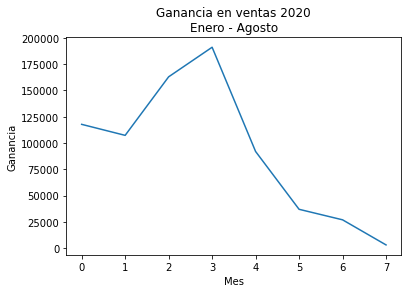

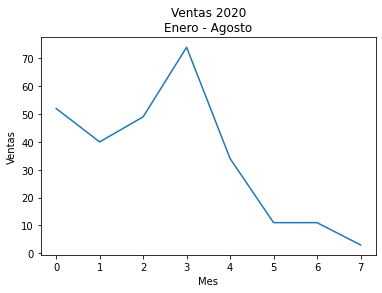

In [27]:
#Gráficas mes a mes

#Ganancias mes a mes
plt.figure()
monthlyProfit = [janProfit, febProfit, marProfit, aprProfit, mayProfit, junProfit, julProfit, augProfit]
plt.plot(monthlyProfit)
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.title('Ganancia en ventas 2020\nEnero - Agosto')

#Ventas mes a mes
plt.figure()
n_monthlySales = [len(jan), len(feb), len(mar), len(apr), len(may), len(jun), len(jul), len(aug)]
plt.plot(n_monthlySales)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas 2020\nEnero - Agosto');

In [28]:
#Top 3 meses con más ventas
monthlyProfit = [janProfit, febProfit, marProfit, aprProfit, mayProfit, junProfit, julProfit, augProfit]
monthlyProfit = sorted(monthlyProfit, reverse = True)
print('Las mejores ganacias fueron de {}, {} y {}; que corresponden a los meses de abril, marzo y enero.'.format(
       monthlyProfit[0], monthlyProfit[1], monthlyProfit[2]))

Las mejores ganacias fueron de 191066, 162931 y 117738; que corresponden a los meses de abril, marzo y enero.


In [29]:
#Ganancia total
totalProfit = janProfit + febProfit + marProfit + aprProfit + mayProfit + junProfit + julProfit + augProfit
print('La ganancia total en el año 2020 hasta agosto es de: {}'.format(totalProfit))

La ganancia total en el año 2020 hasta agosto es de: 737916
